In [3]:
%load_ext autoreload
%autoreload 2
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from classes.classes import ScaledPostgresModelConfig, FlatModelConfig, E2EModelConfig, MSCNModelConfig, \
    QPPNetModelConfig, ZeroShotModelConfig, DACEModelConfig
from classes.workloads import EvalWorkloads
from cross_db_benchmark.datasets.datasets import Database
from evaluation.eval import Evaluator
from evaluation.evaluation_metrics import QError, RMSE, SpearmanCorrelation
from evaluation.utils import get_model_results, draw_metric, draw_predictions
sns.set_theme(style="whitegrid", font_scale=1.8)
fontsize = 16

Cardinalities missing for plan 1_attributes
Cardinalities missing for plan 2_attributes
Cardinalities missing for plan 3_attributes
Cardinalities missing for plan 4_attributes
Cardinalities missing for plan 5_attributes
Cardinalities missing for plan 6_attributes
Cardinalities missing for plan 7_attributes
Cardinalities missing for plan 8_attributes
Cardinalities missing for plan 9_attributes
Cardinalities missing for plan 1_attributes
Cardinalities missing for plan 2_attributes
Cardinalities missing for plan 3_attributes
Cardinalities missing for plan 4_attributes
Cardinalities missing for plan 5_attributes
Cardinalities missing for plan 6_attributes
Cardinalities missing for plan 7_attributes
Cardinalities missing for plan 8_attributes
Cardinalities missing for plan 9_attributes


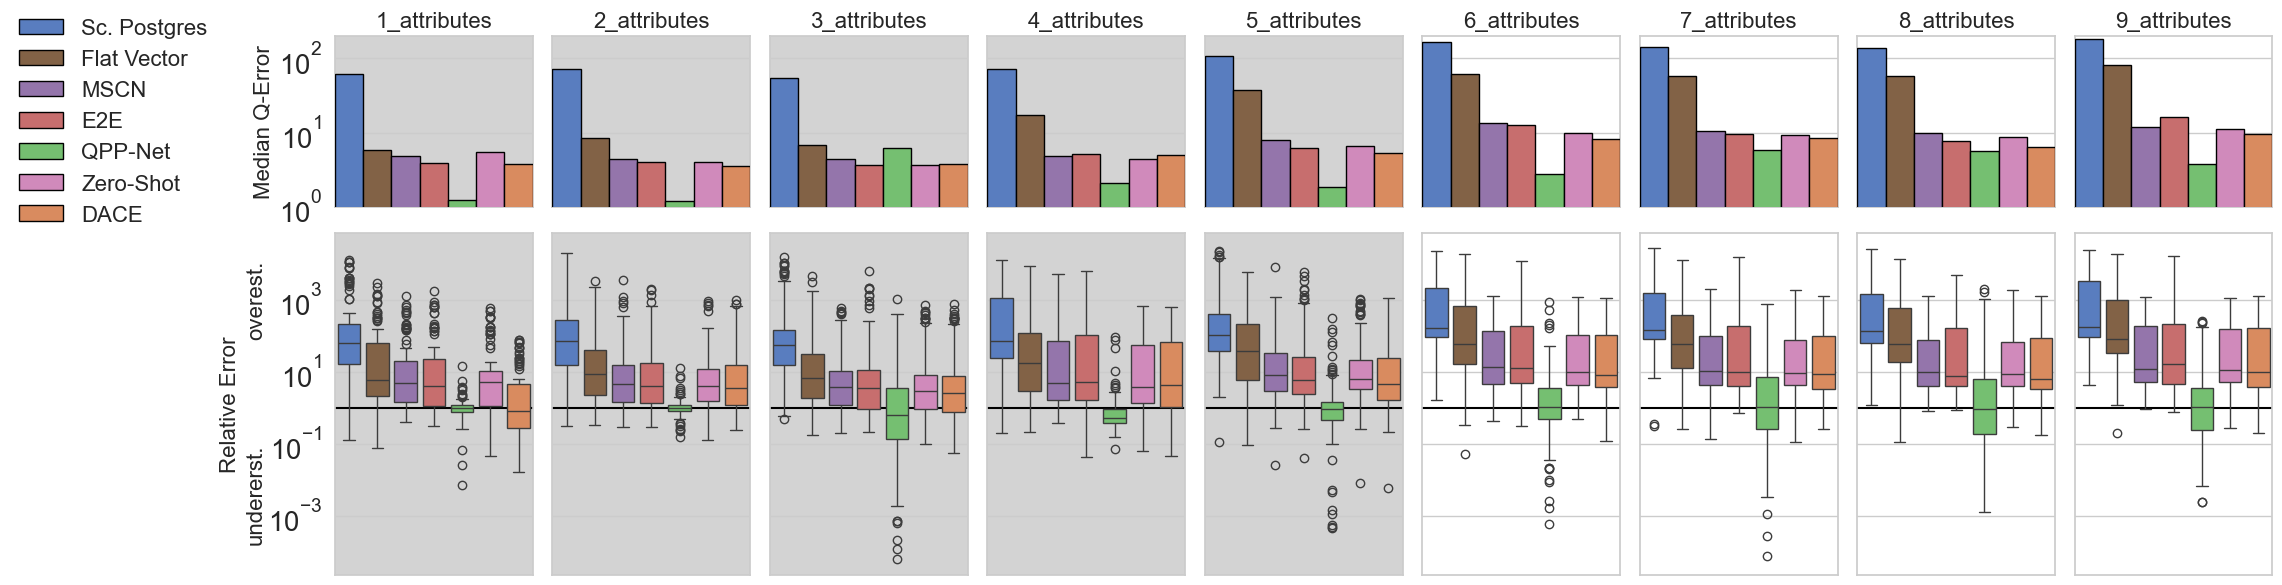

In [99]:
from evaluation.evaluation_metrics import MeanAbsoluteError

metric =  QError()
fig, axs = plt.subplots(2, 9, figsize=(25, 7), sharey="row", height_ratios=[1, 2], gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
workloads = EvalWorkloads.NumPredicates.baseball
model_configs = [
    ScaledPostgresModelConfig(),
    FlatModelConfig(),
    MSCNModelConfig(),
    E2EModelConfig(),
    QPPNetModelConfig(),
    ZeroShotModelConfig(),
    DACEModelConfig()
]
model_color_dict = {model.display_name: model.color for model in model_configs}

for wl, ax in zip(workloads, axs[0]):
    results = get_model_results(wl, model_configs)
    results_df = pd.DataFrame({
    model.display_name: metric.evaluate_metric(
        results[results["model"] == model.display_name]["prediction"],
        results[results["model"] == model.display_name]['runtime']) for model in model_configs},
    index=[metric.metric_name]).T
    results['factor'] = results['prediction'] / results['runtime']
    
    for model_conf in model_configs:
        res = results_df[results_df.index == model_conf.display_name]
        seaborn.barplot(data=res, x=res.index, y=metric.metric_name, ax=ax, palette=model_color_dict,
                        zorder=3, width=1.0, hue=res.index, label=model_conf.display_name, edgecolor='black')
    ax.set_title(wl.get_workload_name(), fontsize=fontsize)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1, top=200)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Median Q-Error", fontsize=fontsize)
    if wl in workloads[0:5]:
        ax.set_facecolor('lightgray')



for wl, ax in zip(workloads, axs[1]):
    results = get_model_results(wl, model_configs)
    results['factor'] = results['prediction'] / results['runtime']
    sns.boxplot(data=results, x='model', y='factor', ax=ax, palette=model_color_dict, hue='model', order=[model.display_name for model in model_configs])
    ax.set_yscale('log')
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Relative Error", fontsize=fontsize, labelpad=20)
    ax.axhline(y=1, color='black', zorder=-100)
    if wl in workloads[0:5]:
        ax.set_facecolor('lightgray')

axs[0, 0].legend(fontsize=fontsize, ncol=1, loc='center left', bbox_to_anchor=(-1.7, 0.5), 
            facecolor='white', 
            edgecolor='white', 
            title_fontsize=fontsize, 
            framealpha=1)

axs[1, 0].text(-0.45, 0.1, "undererst.", fontsize=fontsize, transform=axs[1, 0].transAxes, rotation=90)
axs[1, 0].text(-0.45, 0.7, "overest.", fontsize=fontsize, transform=axs[1, 0].transAxes, rotation=90)

plt.show()